# Lab 3 Report

Seth Richards and Anup Paudel

In [1]:
# import cell

import numpy as np
from scipy.io import wavfile as wav
import simpleaudio as sa
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

## Summary

In this lab, we learn how to create and modify the unit step and unit impulse function, and use them to perform signal convolutions. We show this both graphically and audibly through time shift and signal amplifications. Finally, we use those concepts and techniques to repair a broken audio file, which is then played



## Assignment 1: Convolving Signals

In [2]:
def u(t):
    return 1 * (t>0)

def delta(t,fs):
    return fs * np.concatenate([[0],np.diff(u(t))])

In [67]:
#A1

# Part A

fs = 1000
epsilon = 0.00001
t = np.arange(0,4 + epsilon,1/fs) #using t instead of th

x = u(t-1)-u(t-3)

h1 = delta(t-1,fs)
h2 = u(t)-u(t-1)
h3 = u(t) - (2*u(t-0.5)) + u(t-1)

<IPython.core.display.Javascript object>


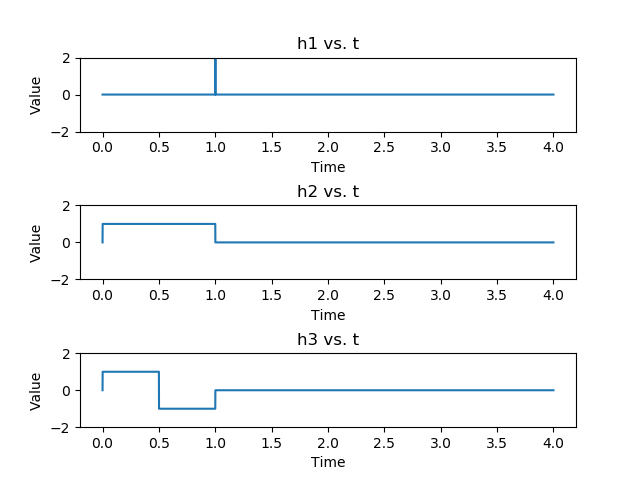

In [68]:
# Part B

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(3,1,1)
plt.title('h1 vs. t')
plt.ylim(-2,2)
plt.plot(t,h1)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.title('h2 vs. t')
plt.plot(t,h2)
plt.ylim(-2,2)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.title('h3 vs. t')
plt.ylim(-2,2)
plt.plot(t,h3)
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

In [5]:
# Part C
y1 = np.convolve(x,h1)/fs # ,mode='same'
y2 = np.convolve(x,h2)/fs
y3 = np.convolve(x,h3)/fs

<IPython.core.display.Javascript object>


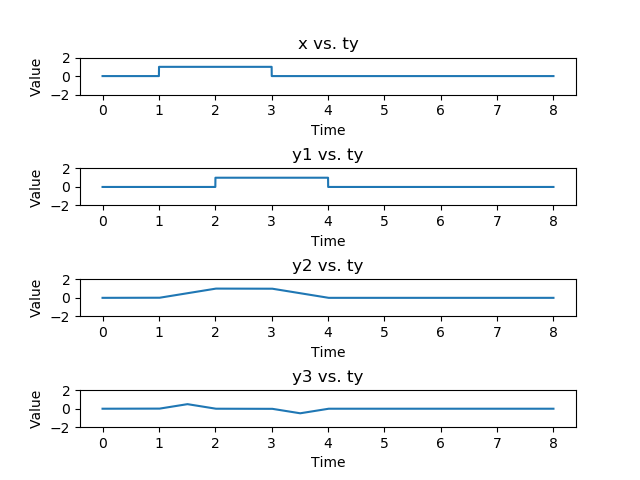

In [6]:
# Part D

ty = np.arange(0,8+epsilon,1/fs) #using t instead of th

# redfine x to fit with new time bound
x2 = u(ty-1)-u(ty-3)

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=2,wspace=0.6)

plt.subplot(4,1,1)
plt.title('x vs. ty')
plt.ylim(-2,2)
plt.plot(ty,x2)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(4,1,2)
plt.title('y1 vs. ty')
plt.plot(ty,y1)
plt.ylim(-2,2)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(4,1,3)
plt.title('y2 vs. ty')
plt.ylim(-2,2)
plt.plot(ty,y2)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(4,1,4)
plt.title('y3 vs. ty')
plt.ylim(-2,2)
plt.plot(ty,y3)
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

### Discussion

If fs was set to 10 instead of 1000, we would have less data points to plot, meaning that matplotlib may include a slope where there should be a delta, or even omit the data entirely given a small enough fs.

Both h2 and h3 adjust the input pulse to match the shape of the input to fit between 0 and 1 regardless of the inputs time shift. While h2 just fits the input between the unit pulse, h3 splits the input into two pieces and inverts the second half, making a periodic signal potentially.

## Assignment 2 : Revisiting Time Delay Transformation 

In [7]:
#A2

# Part A

fs,x = wav.read("train32.wav")
ep = 0.0000003
t_x =np.arange(0,2 + ep,1/fs)
xZeroes = np.zeros(t_x.shape[0] - x.shape[0])
x = np.concatenate([x,xZeroes])

In [8]:
# Part B

hd = delta(t_x - 1,fs)
t_h = np.arange(0,2 + ep,1/fs)

In [9]:
# Part C 

y = np.convolve(x,hd)/fs
t_y = np.arange(0,6,1/fs)

yZeroes = np.zeros(t_y.shape[0] - y.shape[0])
y = np.concatenate([y,yZeroes])



<IPython.core.display.Javascript object>


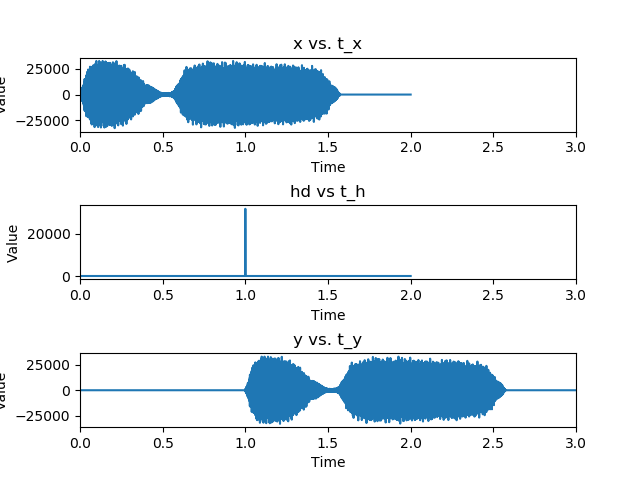

In [10]:
# Part D

fig3 = plt.figure(3)
fig3.subplots_adjust(hspace=1,wspace=0.4)


plt.subplot(3,1,1)
plt.title('x vs. t_x')
plt.xlim(0,3)
plt.plot(t_x,x)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.title('hd vs t_h')
plt.plot(t_h,hd)
plt.xlim(0,3)
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.title('y vs. t_y')
plt.xlim(0,3)
plt.plot(t_y,y)
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()


### Discussion

If y(t) was scaled by h(t), I believe this is would return simply the sampling of y(t) at t = 1, which would be a single data point and not sound like much of anything.

This question is very confusing in wording.

## Assignment 3 : Audio File Realignment

In [52]:
#A3

# Part A
fs1,x1 = wav.read("x1.wav")
fs1,x2 = wav.read("x2.wav")
fs1,x3 = wav.read("x3.wav")

tx =np.arange(0,3,1/fs1)

x1 = x1[:,0]
x2 = x2[:,0]
x3 = x3[:,0]


In [53]:
# Part B

h4 = delta(tx - 1,fs1)
h5 = 10 * delta(tx, fs1)
h6 = delta(tx - 2,fs1)

In [54]:
# Part C

y11 = np.convolve(x1,h4)/fs1
y21 = np.convolve(x2,h5)/fs1
y31 = np.convolve(x3,h6)/fs1

In [64]:
ty = np.arange(0,9,1/fs1)
y1Zeroes = np.zeros(ty.shape[0] - y11.shape[0])
y2Zeroes = np.zeros(ty.shape[0] - y21.shape[0])
y3Zeroes = np.zeros(ty.shape[0] - y31.shape[0])

y11 = np.concatenate([y11,y1Zeroes])
y21 = np.concatenate([y21,y2Zeroes])
y31 = np.concatenate([y31,y3Zeroes])

completeAudio = np.zeros(len(y11))
completeAudio = y11 + y21 + y31

In [62]:
# Part D

wav.write('completeAudio.wav',fs1,completeAudio.astype('int16'))
fs2,playAudio = wav.read("completeAudio.wav")

play_obj =sa.play_buffer(playAudio, 1, 2, fs2)
play_obj.wait_done()


### Discussion

If you put x2 into all three filters (like I actually mistakenly did the first time), you would hear first the sound amplified by 10 (loud), followed by an overlap of the signal delayed by one second, followed by the overlap of the signal delayed by two seconds, sounding absolutely terrible like some kind of echo.